In [1]:
import os
import tweepy
import pandas as pd
from dotenv import load_dotenv, find_dotenv

env_path = find_dotenv()
load_dotenv(env_path)
bearer_token = os.getenv('BEARER_TOKEN')

In [2]:
client = tweepy.Client(bearer_token=bearer_token)

In [3]:
query = '"iphone 7" lang:pt'

In [4]:
tweets = client.search_recent_tweets(query=query, 
                                     tweet_fields=['author_id','created_at','source','entities'],
                                     max_results=10)

In [5]:
for tweet in tweets.data:
    print(tweet.text)
    print(f"Tweet id : {tweet.id}")
    print(f"Author id : {tweet.author_id}")
    print(f"Date : {tweet.created_at}")
    print(f"Source : {tweet.source}")
    if tweet.entities != None :
        if 'hashtags' in tweet.entities.keys():
            for i in range(len(tweet.entities['hashtags'])):
                hashtags = []
                hashtags.append(tweet.entities['hashtags'][i]['tag'])
            print(f"Hashtags : {hashtags}")
    print('------')

RT @qissofernanda: VENDO
iPhone 7 red 
128gb

RT, pfvr amizades ☺️ https://t.co/pHYJ6k7jh5
Tweet id : 1507374242031095825
Author id : 45952233
Date : 2022-03-25 15:09:59+00:00
Source : Twitter for Android
------
Estarei comercializando meu iPhone 7, 128gb quando retornar ao Brasil. Precinho de crack
Tweet id : 1507370463491772416
Author id : 902298930372907009
Date : 2022-03-25 14:54:58+00:00
Source : Twitter for iPhone
------
RT @xmarianadias: minha mãe prometeu me dar um iphone 7 ate o fim do ano, amem deus
Tweet id : 1507366899746803713
Author id : 923310293110935553
Date : 2022-03-25 14:40:49+00:00
Source : broot do twitter
------
minha mãe prometeu me dar um iphone 7 ate o fim do ano, amem deus
Tweet id : 1507366878200672290
Author id : 1070479397680005120
Date : 2022-03-25 14:40:43+00:00
Source : Twitter for Android
------
@babyseokr @lojinhadoiphone Todos são bons, eu recomendo o iPhone 7 eu tenho um agora estou querendo o 13 kkkk
Tweet id : 1507365955260801031
Author id : 14915

In [6]:
def hashtag_list(tweet):
    hashtags = []
    if tweet.entities != None :
        if 'hashtags' in tweet.entities.keys():
            for i in range(len(tweet.entities['hashtags'])):
                hashtags.append(tweet.entities['hashtags'][i]['tag'])
    return hashtags

In [7]:
tweets_search = [[],[],[],[],[]]
for tweet in tweets.data :
    tweets_search[0].append(tweet.text)
    tweets_search[1].append(tweet.author_id)
    tweets_search[2].append(tweet.created_at)
    tweets_search[3].append(tweet.source)
    tweets_search[4].append(hashtag_list(tweet))

In [8]:
tweets_search

[['RT @qissofernanda: VENDO\niPhone 7 red \n128gb\n\nRT, pfvr amizades ☺️ https://t.co/pHYJ6k7jh5',
  'Estarei comercializando meu iPhone 7, 128gb quando retornar ao Brasil. Precinho de crack',
  'RT @xmarianadias: minha mãe prometeu me dar um iphone 7 ate o fim do ano, amem deus',
  'minha mãe prometeu me dar um iphone 7 ate o fim do ano, amem deus',
  '@babyseokr @lojinhadoiphone Todos são bons, eu recomendo o iPhone 7 eu tenho um agora estou querendo o 13 kkkk',
  '@babyseokr o iphone SE tem uma câmera incrivelll!! e ele é mais acessível tambem. tem hdr inteligente e modo retrato… o iphone 7 plus e 8 plus tambem tem cameras maravilhosas, mesmo sendo mais antiguinhos',
  'RT @qissofernanda: VENDO\niPhone 7 red \n128gb\n\nRT, pfvr amizades ☺️ https://t.co/pHYJ6k7jh5',
  'RT @qissofernanda: VENDO\niPhone 7 red \n128gb\n\nRT, pfvr amizades ☺️ https://t.co/pHYJ6k7jh5',
  'RT @qissofernanda: VENDO\niPhone 7 red \n128gb\n\nRT, pfvr amizades ☺️ https://t.co/pHYJ6k7jh5',
  'RT @qissofernanda

In [9]:
from thermofeeler.utils import preproc_func

In [10]:
preproc_tweets=[]
for tweet in tweets_search[0]:
    preproc_tweets.append(preproc_func(tweet))

In [11]:
preproc_tweets[0]

['vendo', 'iphone', 'red', 'gb', 'pfvr', 'amizades']

In [12]:
#for tweet in tweepy.Paginator(client.search_recent_tweets, query=query,
#                              tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=1000):
#    print(tweet)

In [13]:
from datetime import datetime, timedelta
tweets_search = []
now = datetime.now() + timedelta(hours=3)
start_time = now - timedelta(days=7)
end_time = now - timedelta(days=6)

for loop in range(6):
    tweets = client.search_recent_tweets(query=query, 
                                     start_time=start_time,
                                     end_time=end_time,
                                     tweet_fields=['author_id','created_at','source','entities'],
                                     max_results=20)
    tweets_search.append(tweets)
    start_time += timedelta(days=1)
    end_time += timedelta(days=1)

In [14]:
tweets_search

[Response(data=[<Tweet id=1505199961528586240 text='tá, mas e se eu comprar um iphone 7 32 g por 997??? Vcs acham uma boa ou eu espero ofertas melhores?\n(Lembrando q meu celular tá pedindo arrego e tenho medo do coitado não aguentar até lá'>, <Tweet id=1505199532853936133 text='@linhares_du @isapoggers e olha que é o iphone 7 em, minúsculo KKKKKKKKKKKKk papo'>, <Tweet id=1505188959583842307 text='esses chineses tao tudo copiando o design dos iPhone e nem pra copiar o do mais recente pega iPhone 7 Plus'>, <Tweet id=1505180312141275141 text='RT @ruancell: Troca da Bateria do IPhone 7 Plus.\nFaça um orçamento, só chamar no número abaixo. \n ⬇️Clique no link e caia direto no WhatsAp…'>, <Tweet id=1505180277009752079 text='RT @ruancell: Troca da Bateria do IPhone 7 Plus.\nFaça um orçamento, só chamar no número abaixo. \n ⬇️Clique no link e caia direto no WhatsAp…'>, <Tweet id=1505180254616363009 text='Troca da Bateria do IPhone 7 Plus.\nFaça um orçamento, só chamar no número abaixo. \n ⬇️C

In [15]:
tweets_ = [[],[],[],[],[]]
for tweets in tweets_search:
    for tweet in tweets.data :
        tweets_[0].append(tweet.text)
        tweets_[1].append(tweet.author_id)
        tweets_[2].append(tweet.created_at)
        tweets_[3].append(tweet.source)
        tweets_[4].append(hashtag_list(tweet))

In [16]:
len(tweets_[0])

108

In [17]:
tweets_

[['tá, mas e se eu comprar um iphone 7 32 g por 997??? Vcs acham uma boa ou eu espero ofertas melhores?\n(Lembrando q meu celular tá pedindo arrego e tenho medo do coitado não aguentar até lá',
  '@linhares_du @isapoggers e olha que é o iphone 7 em, minúsculo KKKKKKKKKKKKk papo',
  'esses chineses tao tudo copiando o design dos iPhone e nem pra copiar o do mais recente pega iPhone 7 Plus',
  'RT @ruancell: Troca da Bateria do IPhone 7 Plus.\nFaça um orçamento, só chamar no número abaixo. \n ⬇️Clique no link e caia direto no WhatsAp…',
  'RT @ruancell: Troca da Bateria do IPhone 7 Plus.\nFaça um orçamento, só chamar no número abaixo. \n ⬇️Clique no link e caia direto no WhatsAp…',
  'Troca da Bateria do IPhone 7 Plus.\nFaça um orçamento, só chamar no número abaixo. \n ⬇️Clique no link e caia direto no WhatsApp⬇️\nWhatsApp: (21) 996950290 #RuanCell\nhttps://t.co/sLzJTf4Fd7 https://t.co/vc8meDUkGI',
  'RT @babsdeavilaa: VENDO IPHONE 7 PLUS 128GB!! \n77% de bateria \nApenas tela trincada e

In [18]:
import seaborn as sns

In [19]:
import matplotlib.pyplot as plt

In [20]:
from thermofeeler.twitter_api import twitter_request_week
from thermofeeler.utils import twitter_data_week

In [21]:
tweets_week = twitter_request_week(query)

In [22]:
tweets = twitter_data_week(tweets_week)

In [23]:
tweets

[['tá, mas e se eu comprar um iphone 7 32 g por 997??? Vcs acham uma boa ou eu espero ofertas melhores?\n(Lembrando q meu celular tá pedindo arrego e tenho medo do coitado não aguentar até lá',
  '@linhares_du @isapoggers e olha que é o iphone 7 em, minúsculo KKKKKKKKKKKKk papo',
  'esses chineses tao tudo copiando o design dos iPhone e nem pra copiar o do mais recente pega iPhone 7 Plus',
  'RT @ruancell: Troca da Bateria do IPhone 7 Plus.\nFaça um orçamento, só chamar no número abaixo. \n ⬇️Clique no link e caia direto no WhatsAp…',
  'RT @ruancell: Troca da Bateria do IPhone 7 Plus.\nFaça um orçamento, só chamar no número abaixo. \n ⬇️Clique no link e caia direto no WhatsAp…',
  'Troca da Bateria do IPhone 7 Plus.\nFaça um orçamento, só chamar no número abaixo. \n ⬇️Clique no link e caia direto no WhatsApp⬇️\nWhatsApp: (21) 996950290 #RuanCell\nhttps://t.co/sLzJTf4Fd7 https://t.co/vc8meDUkGI',
  'RT @babsdeavilaa: VENDO IPHONE 7 PLUS 128GB!! \n77% de bateria \nApenas tela trincada e

In [24]:
from thermofeeler.predict import predict_week

In [25]:
tweets_list, predict_list = predict_week(query)

Getting tweets...
Organizing tweets...
Preprocessing tweets...
Tokenzing tweets...
Predicting sentiments...


2022-03-25 12:10:29.380086: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-25 12:10:30.063038: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-03-25 12:10:30.073420: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-03-25 12:10:30.219076: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-03-25

Organizing data...


In [26]:
tweets_list

[['tá, mas e se eu comprar um iphone 7 32 g por 997??? Vcs acham uma boa ou eu espero ofertas melhores?\n(Lembrando q meu celular tá pedindo arrego e tenho medo do coitado não aguentar até lá',
  '@linhares_du @isapoggers e olha que é o iphone 7 em, minúsculo KKKKKKKKKKKKk papo',
  'esses chineses tao tudo copiando o design dos iPhone e nem pra copiar o do mais recente pega iPhone 7 Plus',
  'RT @ruancell: Troca da Bateria do IPhone 7 Plus.\nFaça um orçamento, só chamar no número abaixo. \n ⬇️Clique no link e caia direto no WhatsAp…',
  'RT @ruancell: Troca da Bateria do IPhone 7 Plus.\nFaça um orçamento, só chamar no número abaixo. \n ⬇️Clique no link e caia direto no WhatsAp…',
  'Troca da Bateria do IPhone 7 Plus.\nFaça um orçamento, só chamar no número abaixo. \n ⬇️Clique no link e caia direto no WhatsApp⬇️\nWhatsApp: (21) 996950290 #RuanCell\nhttps://t.co/sLzJTf4Fd7 https://t.co/vc8meDUkGI',
  'RT @babsdeavilaa: VENDO IPHONE 7 PLUS 128GB!! \n77% de bateria \nApenas tela trincada e

In [27]:
for index, value in enumerate(predict_list):
    if value == 0:
        predict_list[index] = -1
    elif value == 1:
        predict_list[index] = 0
    elif value == 2:
        predict_list[index] = 1

In [28]:
df = pd.DataFrame(tweets_list[2],predict_list).reset_index()
df['date'] = df[0].dt.strftime("%d/%m/%Y")
df = df.drop(columns=[0])

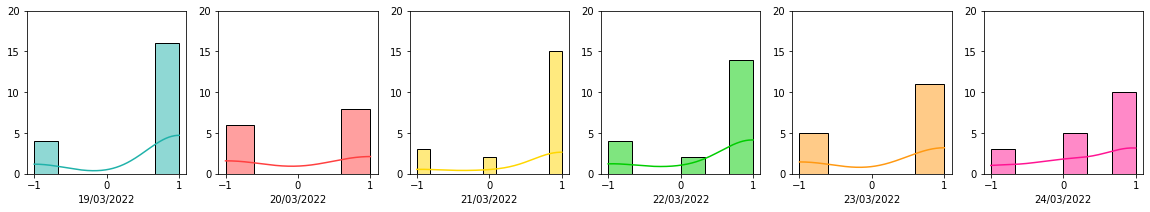

In [29]:
colors = ["#20B2AA","#FF4040","#FFD700","#00CD00","#FF9912", "#FF1493"]

plt.figure(figsize=(20,3))
for i,date,color in zip(range(7), sorted(df.date.unique()),colors):
    plt.subplot(1,6,i+1)
    sentiment_day = df[df['date'] == date]['index']
    sns.histplot(sentiment_day, color=color, kde=True)
    plt.ylabel('')
    plt.xlabel(date)
    plt.yticks([0,5,10,15,20])
    plt.xticks([-1,0,1]);